#### Fourth Sail Challenge
#### Candidate: Felipe Martins

# 1 - Problem Description

The aim of this report is to analyze the energy production data sourced from ONS and Eneva, with the goal of uncovering their interrelationship, distinctive features and make forecast analysis.

##### Eneva
Eneva stands as a prominent integrated energy operator within Brazil, involved in various facets such as natural gas exploration and production (E&P), along with providing comprehensive energy solutions. Operating across multiple states including Amazonas, Maranhão, Mato Grosso do Sul, and Goiás, Eneva manages 12 natural gas fields situated in the Parnaíba and Amazonas basins. Notably, it holds the largest onshore exploration concession area in Brazil, spanning over 63,000 km². With an impressive generation capacity of 5.95 GW in its portfolio, Eneva plays a pivotal role in ensuring reliable and competitive energy supply for the Brazilian electrical grid. Moreover, Eneva actively participates in the Free Energy and Natural Gas Market, boasting a robust business platform and being listed on the B3's New Market since 2007.
##### ONS
The National System Operator (ONS) assumes responsibility for coordinating and overseeing the operation of electricity generation and transmission facilities within the National Interconnected System (SIN). Additionally, ONS is tasked with planning the operations of isolated systems across the country, operating under the supervision and regulation of the National Electric Energy Agency (ANEEL).

# 2 - Methodology
#### 2.1 - ONS data
The data sourced from ONS was collected using an automated script to download files from the website: https://dados.ons.org.br/dataset/geracao-usina-2. These files were filtered to include specific power plants: Maranhão III, Maranhão IV, Maranhão V, Nova Venécia 2, Parnaíba IV, Parnaíba V, Jaguatirica II, Fortaleza, Porto de Sergipe I, Porto do Itaqui, and Porto do Pecém II. Subsequently, the files were concatenated, and preprocessing steps were applied, including the creation of columns for individual power plants, year, and month. The production data was then aggregated on a monthly basis. Following this, additional columns such as "ID", "group", and "quarter" were generated, and the file was saved as "ons_ts.csv". Additionally, a metadata file detailing information about the power plants was created.
#### 2.2 - Eneva data
The Eneva data was acquired from the website: https://ri.eneva.com.br/informacoes-financeiras/planilhas-interativas/, specifically from the 'Dados Operacionais Trimestrais' tab. The available power plants include: Porto de Itaqui, Porto do Pecém II, Parnaíba I, Parnaíba II, Parnaíba III, Parnaíba IV, Parnaíba V, Jaguatirica II, Porto de Sergipe I, and Fortaleza. Initially, all data was consolidated into a single file, which underwent manual formatting in Google Sheets to ensure compatibility for download as a usable .csv file. The formatted file can be accessed in the "Final" tab of the following link: https://docs.google.com/spreadsheets/d/1z6C00vMYI1gy7xM-CIT6eu6nTKSSzVxaPdJ6IHTlvts/edit?usp=sharing. Subsequently, the data was loaded into a notebook for further processing, which included adding the "ID" and "group" columns, arranging the columns, and finally saving the processed file as "eneva_ts.csv".
#### 2.3 - SQLite database
The SQL database was constructed using the three tables obtained previously: "ons_ts", "ons_metadata", and "eneva_ts". The database file was named "fs_challenge.db".
#### 2.4 - Power BI
The tables in the SQLite database were accessed via ODBC. Subsequently, two new tables were generated: "ons_quart_ts" was created by aggregating the "ons_ts" table to quarterly data, and "ons_eneva_innerjoin" was formed by joining the quarterly datasets of ONS and Eneva on the columns "year", "quarter", and "ceg_label" (power plant), retaining only matched rows. For visualization purposes, the "ons_ts" table was utilized to generate a seasonal plot, incorporating month information. Meanwhile, the "ons_eneva_innerjoin" table was employed to craft a quarterly plot comparing ONS and Eneva data. Additionally, a third visualization was produced showcasing the quarterly production of the ONS dataset. Moreover, in all visualizations, the ONS dataset was converted from megawatt hours (MWmed) to gigawatt hours (GWh) by dividing the aggregation by 1000.
#### 2.5 Trend analysis
To commence the comparison of the ONS and Eneva series in terms of correlation, the "ons_eneva_innerjoin" PowerBI exported dataframe was utilized. For trend analysis and forecasting, the ONS data spanning from Q1-2014 to Q4-2023 was employed. The power plants considered in the analysis were those shared between the two datasets: Parnaíba IV, Parnaíba V, Jaguatirica II, Fortaleza, Porto de Sergipe I, Porto do Itaqui, and Porto do Pecém II.

Descriptive statistics of the series were obtained. Additionally, decomposition, ACF/PACF analysis, and Augmented Dickey-Fuller testing were conducted. The forecasting experiment was conducted using the last four quarters (1 year) as the test set, and five scenarios were explored, considering orders for AR (AutoRegressive) and MA (Moving Average) up to 4: without seasonal effect and differencing; seasonal effect (period=4) with 1 order differencing; seasonal effect (period=2) with 2 order differencing; seasonal effect (period=4) with 2 order differencing; and seasonal effect (period=2) with 2 order differencing.

Four metrics were employed to select the best models: AIC (Akaike Information Criterion), SMAPE (Symmetric Mean Absolute Percentage Error), MSE (Mean Squared Error), and MAE (Mean Absolute Error).

# 3 - Results
## 3.1 - Data wrangling
The ONS data processing resulted in a dataframe comprising 1250 rows aggregated by month. It initially included data from 7 power plants in 2014 and expanded to cover 11 power plants by March 2024. Conversely, the Eneva data, upon processing, yielded a quarterly series containing 213 samples. It commenced in 2016 with data from three power plants and extended to encompass ten power plants by Q3/2023. It's evident that the ONS data exhibits a higher frequency of updates compared to the Eneva data.

In addition to these two dataframes, a metadata table for ONS power plants was created, comprising information for 11 samples. Subsequently, all three datasets were incorporated into the SQLite database.
## 3.2 - Power BI
With the data available in the Power BI, the initial visualization featured a seasonal plot showcasing ONS data. While the difference may not be stark, there is a discernible trend indicating higher production in the second half of the year compared to the first half (Fig. 1). The dashboard filters enable users to select specific power plants, years, and months within the series for further analysis and exploration.
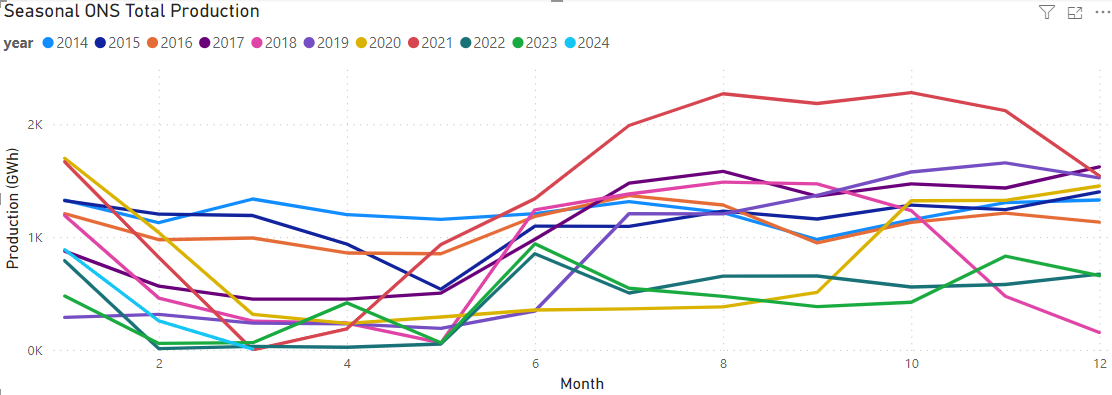

Fig. 1.

The second visualization presents a quarterly comparison of ONS versus Eneva production, exclusively featuring samples shared by both datasets. Despite minor discrepancies, when both datasets provide information for the same time period and power plants, the data consistently reflects the same information, with a correlation of 0.999532 (Fig. 2).
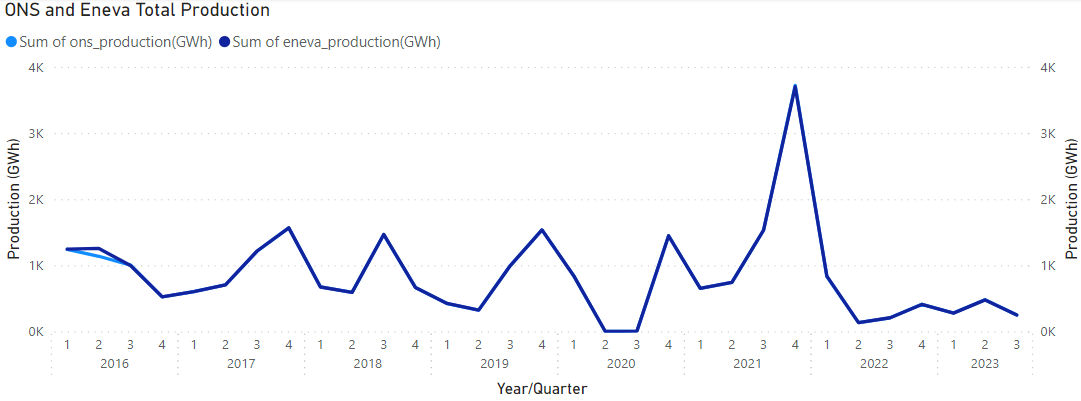

Fig. 2.

Another notable finding from the analysis is that, even for more recent dates, ONS provides more extensive historical data compared to Eneva for the same power plants. This discrepancy is evident when using the visualization in the third tab, featuring quarterly ONS production. For instance, upon selecting 'Porto de Sergipe I' in the filters, it becomes apparent that ONS data begins in Q4/2019, whereas Eneva data starts only in Q4/2021.

These results underscore the superior reliability of ONS data compared to Eneva. Despite requiring processing, ONS data is updated more frequently and offers a richer historical dataset. Hence, for forecasting purposes, ONS data emerges as the more favorable dataset.
## 3.3 - Forecasting
The series used for forecasting contain 40 quarterly samples ranging from 2014 to the end of 2023 (Fig. 3), with a mean value of 1303 GWh, starndard deviation of 857.8, with a min of 134 GWh and a max of 3719 GWh. Given that the decomposition revealed a slight trend in the data (Fig. 4), and the Augmented Dickey-Fuller test indicated a significantly smaller p-value for a first-order differentiation compared to the original dataset (0.0545 and 2.558e-10, respectively), the decision was made to differentiate the series to attain stationarity. Additionally, the ACF/PACF plot for the differenced series exhibited significant autocorrelation at lag 2 (Fig. 5), suggesting the presence of a half-year seasonality previously observed in the data.
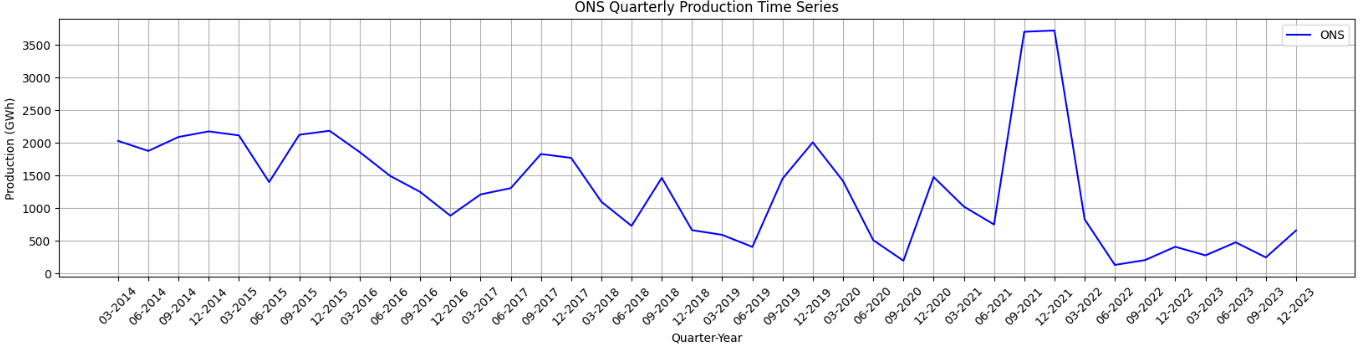

Fig. 3.

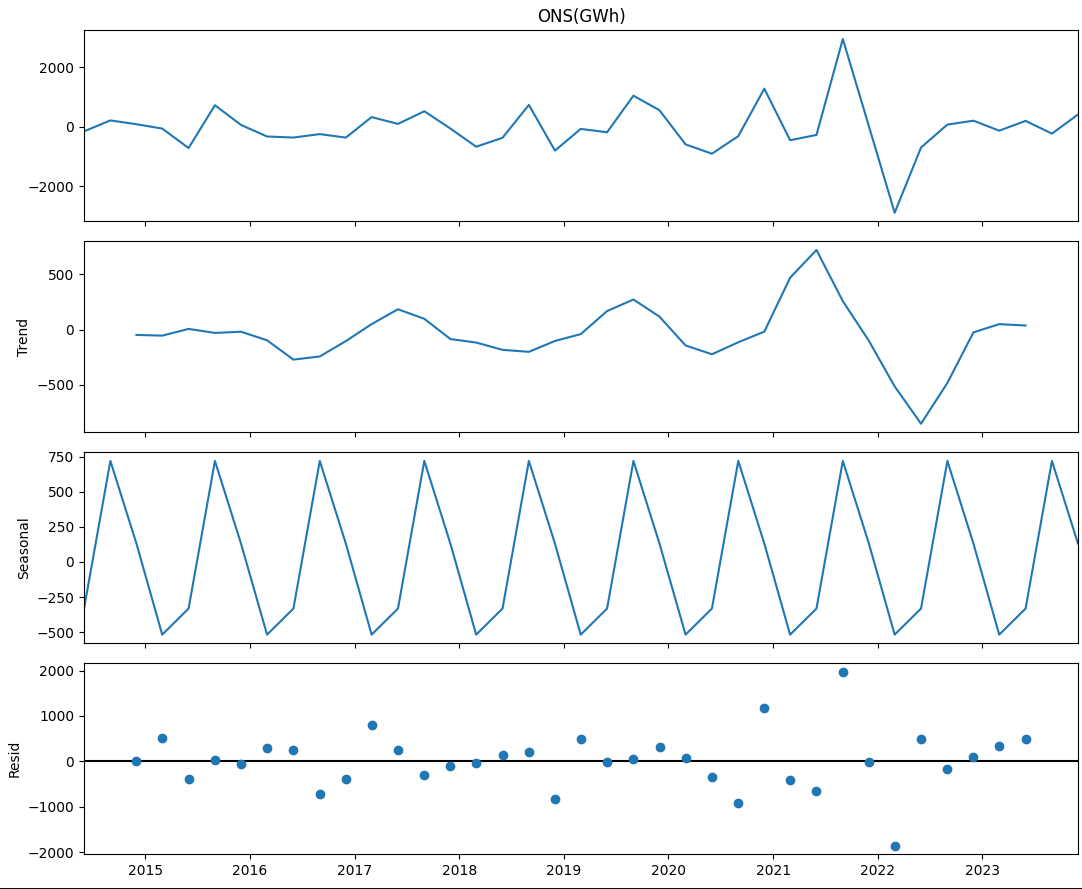

Fig. 4.

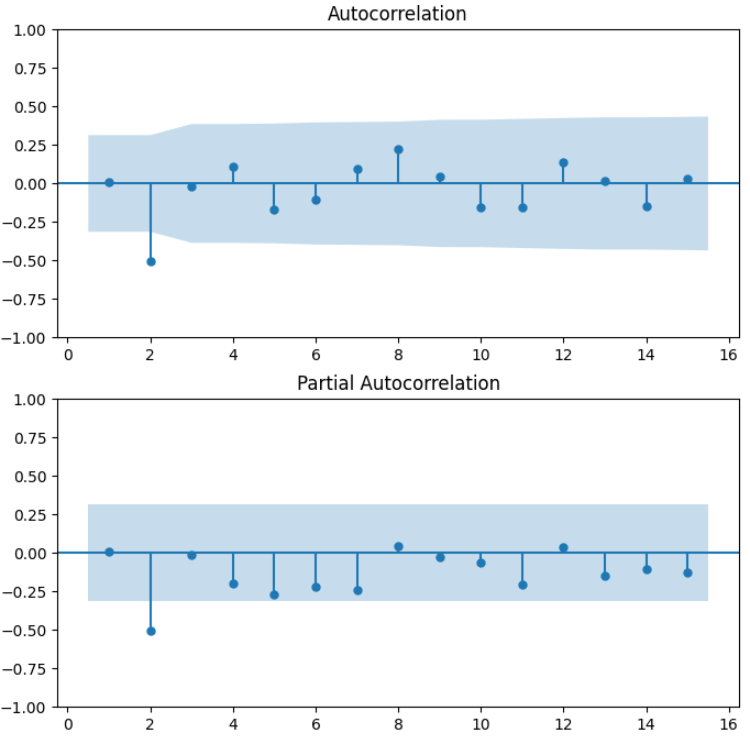

Fig. 5.

Based on these findings, it is reasonable to utilize a first-order differentiation and consider a seasonality of 2 periods in ARIMA modeling. Experimentally, this configuration yielded the most favorable results (Fig. 6). The AR and MA orders were determined by testing various combinations, with the optimal model exhibiting an AIC of 601 and the order combination of (0,1,0)(0,1,2).

The forecasting metrics were as follows: SMAPE=0.488, MSE=93742, and MAE=246.9 GWh. Furthermore, the diagnostic plot displayed expected outcomes: standardized residuals showed no obvious patterns, the histogram plus KDE estimate indicated a distribution similar to the normal distribution, the normal Q-Q plot depicted most data points lying on the straight line, and the correlogram showed that 95% of correlations for lags greater than zero were not significant (Fig. 7).

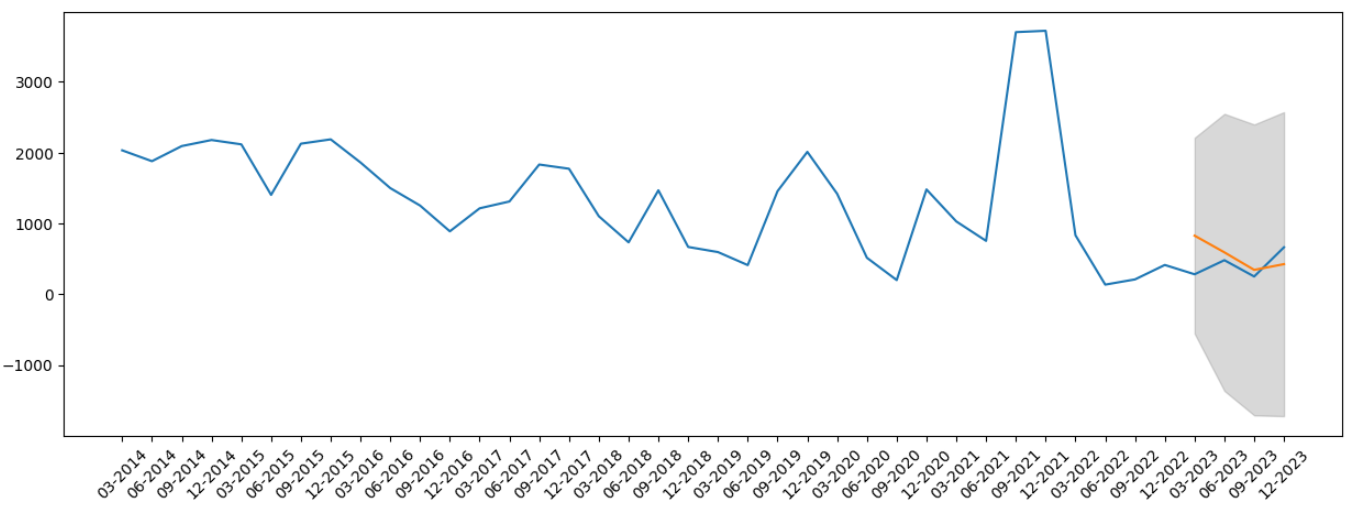
Fig. 6.

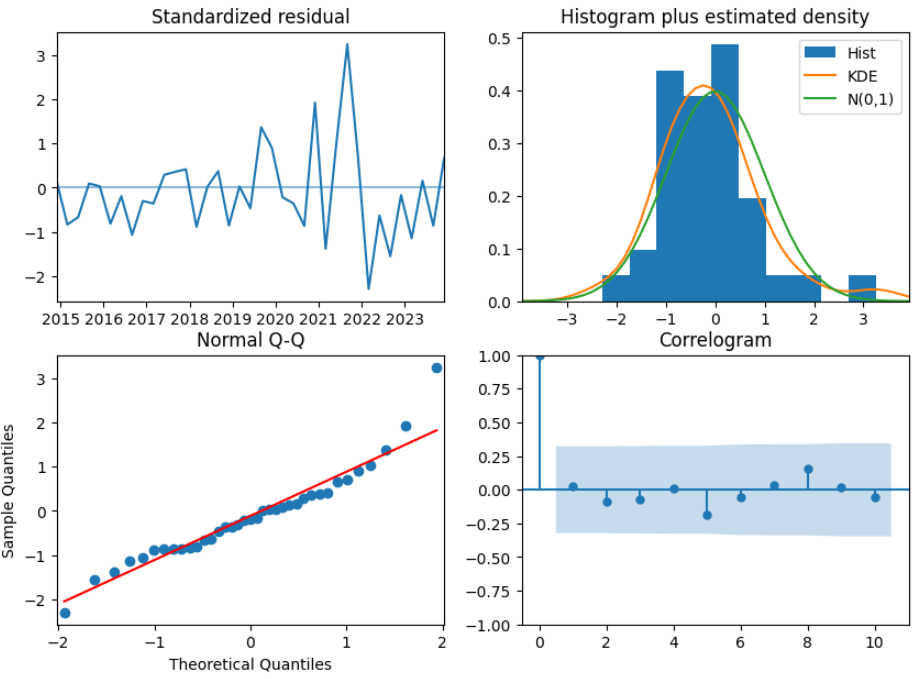
Fig. 7.

## 3.4 - Conclusion

The data from both ONS and Eneva sources were successfully obtained, processed, and analyzed. However, ONS provides more reliable data, enabling the generation of accurate predictions for at least 4 quarters of Eneva production. These predictions, along with their corresponding confidence intervals, hold significant value for data-driven business decision-making. Leveraging such insights can lead to more informed and strategic actions within the energy sector.  

# 4 - Code

## 4.1 - ONS Data

#### 4.1.1 - Download files

In [2]:
import pandas as pd
import os
import requests
from bs4 import BeautifulSoup

In [ ]:
#### remove 2016-4 file after download 
# URL of the webpage
url = 'https://dados.ons.org.br/dataset/geracao-usina-2'

# Folder where you want to save the files
save_folder = 'raw_data/ons/raw_data/'

# Send a GET request to the webpage
response = requests.get(url)

# Parse the HTML content of the webpage
soup = BeautifulSoup(response.content, 'html.parser')

# Find all anchor tags with class 'resource-url-analytics' and filter for CSV files
csv_links = soup.find_all('a', class_='resource-url-analytics', href=lambda href: href and href.endswith('.csv'))

# Loop through the CSV file links
for link in csv_links:
    # Get the href attribute which contains the link to the CSV file
    csv_url = link['href']
    
    # Download the CSV file
    csv_file_name = os.path.basename(csv_url)  # Extract file name from URL
    file_path = os.path.join(save_folder, csv_file_name)
    print(f"Downloading CSV file: {csv_url}")
    response = requests.get(csv_url)
    
    # Save the CSV file
    with open(file_path, 'wb') as f:
        f.write(response.content)
    
    print(f"CSV file downloaded successfully.")

#### 4.1.2 - Filter raw files

In [16]:
ceg_dict = {
    "UTE.GN.MA.030800-5.01": "Maranhão III",
    "UTE.GN.MA.030202-3.01": "Maranhão IV",
    "UTE.GN.MA.030203-1.01": "Maranhão V",
    "UTE.GN.MA.030196-5.01": "Nova Venécia 2",
    "UTE.GN.MA.031193-6.01": "Parnaíba IV",
    "UTE.GN.MA.040562-0.01": "Parnaíba V",
    "UTE.GN.RR.044619-0.01": "Jaguatirica II",
    "UTE.GN.CE.028357-6.01": "Fortaleza",
    "UTE.GN.SE.032228-8.01": "Porto de Sergipe I",
    "UTE.CM.MA.029700-3.01": "Porto do Itaqui",
    "UTE.CM.CE.030098-5.01": "Porto do Pecém II",
}

In [ ]:
filter_values = list(ceg_dict.keys())

# Folder where CSV files are located
folder_path = 'data/ons/raw_data/'

# Write the filtered DataFrame to a CSV file
filt_path = 'data/ons/filt_data/'

# Loop through CSV files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    output_path = os.path.join(filt_path, file_name)
    df = pd.read_csv(file_path, sep=';')
    df = df[df['ceg'].isin(filter_values)].copy()
    df.to_csv(output_path, index=False)
    print(file_name)

#### 4.1.3 - Combine data and preprocess

In [ ]:
# Folder where filtered CSV files are located
folder_path = 'data/ons/filt_data/'

# Initialize an empty DataFrame to store the concatenated data
combined_df = pd.DataFrame()

# Loop through CSV files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)

    df = pd.read_csv(file_path)
    combined_df = pd.concat([combined_df, df], ignore_index=True)

In [14]:
# Convert 'din_instante' column to datetime
combined_df['din_instante'] = pd.to_datetime(combined_df['din_instante'])

# Sort the DataFrame by 'din_instante' column
combined_df = combined_df.sort_values(by='din_instante')


In [17]:
# Create ceg_label column
combined_df['ceg_label'] = combined_df['ceg'].map(ceg_dict)

In [18]:
# Extract year, month
combined_df['year'] = combined_df['din_instante'].dt.year
combined_df['month'] = combined_df['din_instante'].dt.month

In [19]:
combined_df

,din_instante,id_subsistema,nom_subsistema,id_estado,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipocombustivel,nom_usina,id_ons,ceg,val_geracao,ceg_label,year,month
200616,2003-09-26 00:00:00,NE,NORDESTE,CE,CEARA,TIPO I,TÉRMICA,Gás,Fortaleza,NaN,UTE.GN.CE.028357-6.01,0.0,Fortaleza,2003,9
200617,2003-09-26 01:00:00,NE,NORDESTE,CE,CEARA,TIPO I,TÉRMICA,Gás,Fortaleza,NaN,UTE.GN.CE.028357-6.01,0.0,Fortaleza,2003,9
200618,2003-09-26 02:00:00,NE,NORDESTE,CE,CEARA,TIPO I,TÉRMICA,Gás,Fortaleza,NaN,UTE.GN.CE.028357-6.01,0.0,Fortaleza,2003,9
200619,2003-09-26 03:00:00,NE,NORDESTE,CE,CEARA,TIPO I,TÉRMICA,Gás,Fortaleza,NaN,UTE.GN.CE.028357-6.01,0.0,Fortaleza,2003,9
200620,2003-09-26 04:00:00,NE,NORDESTE,CE,CEARA,TIPO I,TÉRMICA,Gás,Fortaleza,NaN,UTE.GN.CE.028357-6.01,0.0,Fortaleza,2003,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200607,2024-03-03 23:00:00,N,NORTE,MA,MARANHAO,TIPO I,TÉRMICA,Gás,Maranhão III,MAUTM3,UTE.GN.MA.030800-5.01,0.0,Maranhão III,2024,3
200606,2024-03-03 23:00:00,N,NORTE,MA,MARANHAO,TIPO I,TÉRMICA,Gás,Parnaíba V,MAUTP5,UTE.GN.MA.040562-0.01,0.0,Parnaíba V,2024,3
200605,2024-03-03 23:00:00,N,NORTE,MA,MARANHAO,TIPO I,TÉRMICA,Gás,Parnaíba IV,MAUTP4,UTE.GN.MA.031193-6.01,0.0,Parnaíba IV,2024,3
200610,2024-03-03 23:00:00,N,NORTE,MA,MARANHAO,TIPO I,TÉRMICA,Gás,Maranhão V,MAUTM5,UTE.GN.MA.030203-1.01,0.0,Maranhão V,2024,3


#### 4.1.4 - Aggregating data

In [20]:
agg_func = {
    'val_geracao': 'sum',
    # Sum the production
}

# Group by year, month, and label, and aggregate using the custom aggregation function
monthly_aggregated_df = combined_df.groupby(['year', 'month', 'ceg_label']).agg(agg_func).reset_index()

In [21]:
monthly_aggregated_df

,year,month,ceg_label,val_geracao
0,2003,9,Fortaleza,176.910
1,2003,10,Fortaleza,10368.030
2,2003,11,Fortaleza,26124.710
3,2003,12,Fortaleza,60567.540
4,2004,1,Fortaleza,175933.600
...,...,...,...,...
1245,2024,3,Parnaíba IV,0.000
1246,2024,3,Parnaíba V,0.022
1247,2024,3,Porto de Sergipe I,0.000
1248,2024,3,Porto do Itaqui,0.000


#### 4.1.5 - Number of powerplants

In [117]:
### 2014
df = monthly_aggregated_df[(monthly_aggregated_df['year']==2014) & (monthly_aggregated_df['month']==1)].copy()
df
### 7 powerplants

,year,month,ceg_label,val_geracao
172,2014,1,Fortaleza,212426.800
173,2014,1,Maranhão IV,247227.730
174,2014,1,Maranhão V,243075.570
175,2014,1,Nova Venécia 2,118296.320
176,2014,1,Parnaíba IV,34599.970
177,2014,1,Porto do Itaqui,212021.180
178,2014,1,Porto do Pecém II,260167.303


In [95]:
### 2024
df = monthly_aggregated_df[(monthly_aggregated_df['year']==2024) & (monthly_aggregated_df['month']==1)].copy()
df
### 11 powerplants

,year,month,ceg_label,val_geracao
1217,2024,1,Fortaleza,64.944
1218,2024,1,Jaguatirica II,77214.946
1219,2024,1,Maranhão III,368764.644
1220,2024,1,Maranhão IV,113405.008
1221,2024,1,Maranhão V,111288.557
1222,2024,1,Nova Venécia 2,47178.064
1223,2024,1,Parnaíba IV,24051.941
1224,2024,1,Parnaíba V,143488.824
1225,2024,1,Porto de Sergipe I,0.000
1226,2024,1,Porto do Itaqui,3020.391


#### 4.1.6 - Final data 2014-2024

In [22]:
df_final = monthly_aggregated_df[monthly_aggregated_df['year'] > 2013].copy()
df_final

,year,month,ceg_label,val_geracao
172,2014,1,Fortaleza,212426.800
173,2014,1,Maranhão IV,247227.730
174,2014,1,Maranhão V,243075.570
175,2014,1,Nova Venécia 2,118296.320
176,2014,1,Parnaíba IV,34599.970
...,...,...,...,...
1245,2024,3,Parnaíba IV,0.000
1246,2024,3,Parnaíba V,0.022
1247,2024,3,Porto de Sergipe I,0.000
1248,2024,3,Porto do Itaqui,0.000


In [23]:
#Check the aggregation
df = combined_df[(combined_df['ceg_label'] == 'Fortaleza') & (combined_df['year'] == 2014) & (combined_df['month'] == 1)].copy()
df['val_geracao'].sum()

212426.8

In [24]:
#Check the aggregation
df = combined_df[(combined_df['ceg_label'] == 'Parnaíba V') & (combined_df['year'] == 2024) & (combined_df['month'] == 3)].copy()
df['val_geracao'].sum()

0.022000000000000002

In [25]:
# Create a function to convert month to quarter
def month_to_quarter(month):
    return (month - 1) // 3 + 1

In [26]:
group_dict = {"Parnaiba Consolidated": ["Nova Venécia 2", "Maranhão IV", "Maranhão V", "Maranhão III", "Parnaíba IV", "Parnaíba V"],
              "Coal Consolidated": ["Porto do Itaqui", "Porto do Pecém II"],
              "Roraima":"Jaguatirica II",
              "Third-part LNG":["Fortaleza","Porto de Sergipe I"]
}

# Function to map values to groups
def map_to_group(value):
    for group, values in group_dict.items():
        if value in values:
            return group
    return None

In [27]:
# Create 'quarter' column
df_final['quarter'] = df_final['month'].apply(month_to_quarter)
# Create 'group'column
df_final['group'] = df_final['ceg_label'].map(map_to_group)
# Create 'id'column
df_final['id'] = range(1, len(df_final) + 1)
# Arrange columns
df_final = df_final[['id','year','quarter','month','ceg_label','group','val_geracao']]
# Save df to .csv
df_final.to_csv('data/ons_ts.csv', index=False)

In [28]:
df_final

,id,year,quarter,month,ceg_label,group,val_geracao
172,1,2014,1,1,Fortaleza,Third-part LNG,212426.800
173,2,2014,1,1,Maranhão IV,Parnaiba Consolidated,247227.730
174,3,2014,1,1,Maranhão V,Parnaiba Consolidated,243075.570
175,4,2014,1,1,Nova Venécia 2,Parnaiba Consolidated,118296.320
176,5,2014,1,1,Parnaíba IV,Parnaiba Consolidated,34599.970
...,...,...,...,...,...,...,...
1245,1074,2024,1,3,Parnaíba IV,Parnaiba Consolidated,0.000
1246,1075,2024,1,3,Parnaíba V,Parnaiba Consolidated,0.022
1247,1076,2024,1,3,Porto de Sergipe I,Third-part LNG,0.000
1248,1077,2024,1,3,Porto do Itaqui,Coal Consolidated,0.000


#### 4.1.7 - ONS metadata

In [29]:
# Remove the columns of the timeseries
other_cols = combined_df.drop(['din_instante','val_geracao','year','month'],axis=1)

In [30]:
# Drop duplicated rows to have the unique combinations as metadata
metadata = other_cols.drop_duplicates().dropna()

In [31]:
metadata

,id_subsistema,nom_subsistema,id_estado,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipocombustivel,nom_usina,id_ons,ceg,ceg_label
220485,NE,NORDESTE,CE,CEARA,TIPO I,TÉRMICA,Gás,Fortaleza,CEUTFO,UTE.GN.CE.028357-6.01,Fortaleza
741119,NE,NORDESTE,CE,CEARA,TIPO I,TÉRMICA,Carvão,Porto do Pecém II,CEUTPD,UTE.CM.CE.030098-5.01,Porto do Pecém II
741118,N,NORTE,MA,MARANHAO,TIPO I,TÉRMICA,Gás,Maranhão V,MAUTM5,UTE.GN.MA.030203-1.01,Maranhão V
741113,N,NORTE,MA,MARANHAO,TIPO I,TÉRMICA,Gás,Maranhão III,MAUTM3,UTE.GN.MA.030800-5.01,Maranhão III
741116,N,NORTE,MA,MARANHAO,TIPO I,TÉRMICA,Gás,Parnaíba IV,MAUTP4,UTE.GN.MA.031193-6.01,Parnaíba IV
741115,N,NORTE,MA,MARANHAO,TIPO I,TÉRMICA,Gás,MC2 Nova Venécia 2,MAUTNV,UTE.GN.MA.030196-5.01,Nova Venécia 2
741114,N,NORTE,MA,MARANHAO,TIPO I,TÉRMICA,Gás,Maranhão IV,MAUTM4,UTE.GN.MA.030202-3.01,Maranhão IV
741117,N,NORTE,MA,MARANHAO,TIPO I,TÉRMICA,Carvão,Porto do Itaqui,MAUTPI,UTE.CM.MA.029700-3.01,Porto do Itaqui
744961,NE,NORDESTE,SE,SERGIPE,TIPO I,TÉRMICA,Gás,Porto de Sergipe I,SEUPS1,UTE.GN.SE.032228-8.01,Porto de Sergipe I
9726,N,NORTE,RR,RORAIMA,TIPO I,TÉRMICA,Gás,Jaguatirica II,RRJII,UTE.GN.RR.044619-0.01,Jaguatirica II


In [32]:
# Save df to .csv
metadata.to_csv('data/ons_metadata.csv', index=False)

## 4.2 - Eneva Data

In [10]:
### Read csv with raw data. This file was manually constructed based on the Eneva official report.
operating_perf = pd.read_csv('data/eneva_raw.csv')

In [11]:
# Function to map values to groups
def map_to_group(value):
    for group, values in group_dict.items():
        if value in values:
            return group
    return None

# Sort data by year and quarter
operating_perf = operating_perf.sort_values(by=['year', 'quarter'])
# Create 'id' column
operating_perf['id'] = range(1, len(operating_perf) + 1)
# Creat 'group' column
operating_perf['group'] = operating_perf['ceg_label'].map(map_to_group)
# Arrange columns
operating_perf = operating_perf[['id','year','quarter','ceg_label','group','taxa_de_disponibilidade',
                                 'taxa_de_despacho','geração_líquida_GWh','geração_bruta_GWh',
                                 'taxa_de_geração_ACR','taxa_de_geração_ACL','receita_variável_líquida_R$/MWh','cvu_R$/MWh']]
operating_perf

,id,year,quarter,ceg_label,group,taxa_de_disponibilidade,taxa_de_despacho,geração_líquida_GWh,geração_bruta_GWh,taxa_de_geração_ACR,taxa_de_geração_ACL,receita_variável_líquida_R$/MWh,cvu_R$/MWh
30,1,2016,1,Porto do Itaqui,Coal Consolidated,"0,87","0,71",454.0,516,N.A,N.A,105,102.0
61,2,2016,1,Porto do Pecém II,Coal Consolidated,"0,95","0,86",595.0,664,N.A,N.A,128,107.0
92,3,2016,1,Parnaíba IV,Parnaiba Consolidated,"0,78","0,62",62.0,65,N.A,N.A,N.A,NaN
150,4,2016,1,Parnaíba I,None,89%,77%,1021.0,1074,N.A,N.A,92,92.0
181,5,2016,1,Parnaíba II,None,NaN,NaN,NaN,0,N.A,N.A,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,209,2023,3,Fortaleza,Third-part LNG,"1,00","0,00",0.0,0,"0,00","0,00",0,265.0
120,210,2023,3,Parnaíba I,None,100%,8%,107.0,113,"0,0%","100,0%",218,124.0
151,211,2023,3,Parnaíba II,None,97%,91%,986.0,1043,"100,0%","0,0%",N.A,91.0
182,212,2023,3,Parnaíba II,None,98%,0%,2.0,2,"0,0%","100,0%",0,246.0


In [12]:
# Save to .csv the final file
operating_perf.to_csv('data/eneva_ts.csv', index=False)

## 4.3 Creating SQLite database 

In [51]:
import sqlite3

In [52]:
ons_ts = pd.read_csv('data/ons_ts.csv')
ons_metadata = pd.read_csv('data/ons_metadata.csv')
eneva_ts = pd.read_csv('data/eneva_ts.csv')

In [55]:
# Step 1: Create the SQLite database
conn = sqlite3.connect('fs_challenge.db')
cursor = conn.cursor()

In [56]:
# Step 2: Define Tables
create_ons_table = """
CREATE TABLE IF NOT EXISTS ons_ts (
    id INTEGER PRIMARY KEY,
    year INTEGER,
    quarter INTEGER,
    month INTEGER,
    ceg_label TEXT,
    "group" TEXT,
    val_geracao REAL
);
"""

create_onsmetadata_table = """
CREATE TABLE IF NOT EXISTS ons_metadata (
    id_subsistema TEXT, 
    nom_subsistema TEXT,
    id_estado TEXT,
    nom_estado TEXT,
    cod_modalidadeoperacao TEXT,
    nom_tipousina TEXT,
    nom_tipocombustivel TEXT,
    nom_usina TEXT,
    id_ons TEXT,
    ceg TEXT,
    ceg_label TEXT PRIMARY KEY,
    "group" TEXT
);
"""

create_eneva_table = """
CREATE TABLE IF NOT EXISTS eneva_ts (
    id TEXT PRIMARY KEY,
    year INTEGER,
    quarter INTEGER,
    ceg_label TEXT,
    "group" TEXT,
    taxa_de_disponibilidade	REAL,
    taxa_de_despacho REAL,
    geração_líquida_GWh REAL,
    geração_bruta_GWh REAL,
    taxa_de_geração_ACR REAL,
    taxa_de_geração_ACL REAL,
    "receita_variável_líquida_R$/MWh" REAL,
    "cvu_R$/MWh" REAL
);
"""

In [57]:
# Execute SQL queries to create tables
cursor.execute(create_ons_table)
cursor.execute(create_onsmetadata_table)
cursor.execute(create_eneva_table)

In [58]:
# Write DataFrames to SQLite tables
ons_ts.to_sql('ons_ts', conn, if_exists='append', index=False)
ons_metadata.to_sql('ons_metadata', conn, if_exists='append', index=False)
eneva_ts.to_sql('eneva_ts', conn, if_exists='append', index=False)

213

In [59]:
# Commit changes and close connection
conn.commit()
conn.close()

## 4.4 - Trend analysis

### 4.4.1 - Correlation Eneva and ONS

In [3]:
ons_eneva_ts = pd.read_csv('data/quart_eneva_ons.csv')

In [4]:
ons_eneva_ts[['Sum of eneva_production(GWh)','Sum of ons_production(GWh)']].corr()

,Sum of eneva_production(GWh),Sum of ons_production(GWh)
Sum of eneva_production(GWh),1.000000,0.999532
Sum of ons_production(GWh),0.999532,1.000000


### 4.4.2 - Forecasting ONS data 

#### 4.4.2.1 - First impressions

In [5]:
ons_forecasting = pd.read_csv('data/quart_ons_forecasting.csv')

In [15]:
df = ons_forecasting.copy()
df['date'] = df['year'].astype(str) + 'Q' + df['quarter'].astype(str)
df['date'] = pd.PeriodIndex(df['date'], freq='Q').strftime('%m-%Y')

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Drop the 'year' and 'quarter' columns if they are no longer needed
df.drop(['year', 'quarter'], axis=1, inplace=True)
df = df.rename(columns={'Sum of Quarterly production': 'ONS(GWh)'})
df['ONS(GWh)'] = df['ONS(GWh)']/1000
df['ONS(GWh)'] = df['ONS(GWh)'].apply(lambda x: round(x, 2))

In [28]:
df.head()

,ONS(GWh)
date,
03-2014,2030.79
06-2014,1877.30
09-2014,2090.85
12-2014,2176.50
03-2015,2115.17


In [31]:
df.describe()

,ONS(GWh)
count,40.000000
mean,1302.727500
std,857.859981
min,134.020000
25%,644.500000
50%,1279.670000
75%,1863.800000
max,3719.320000


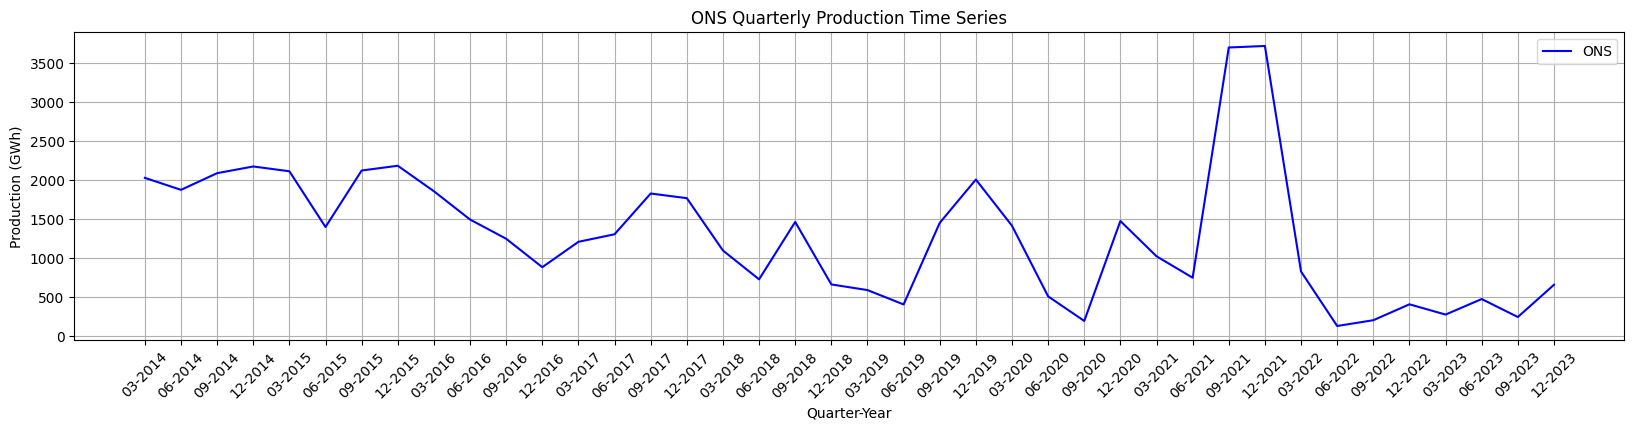

In [8]:
import matplotlib.pyplot as plt

# Assuming your dataframe 'df' contains the time series data
# Plot the time series
plt.figure(figsize=(20, 4))
plt.plot(df.index, df['ONS(GWh)'], label='ONS', color='blue')

# Add title and labels
plt.title('ONS Quarterly Production Time Series')
plt.xlabel('Quarter-Year')
plt.ylabel('Production (GWh)')
plt.xticks(rotation=45)
# Add gridlines
plt.grid(True)

# Add legend
plt.legend()

# Show plot
plt.show()

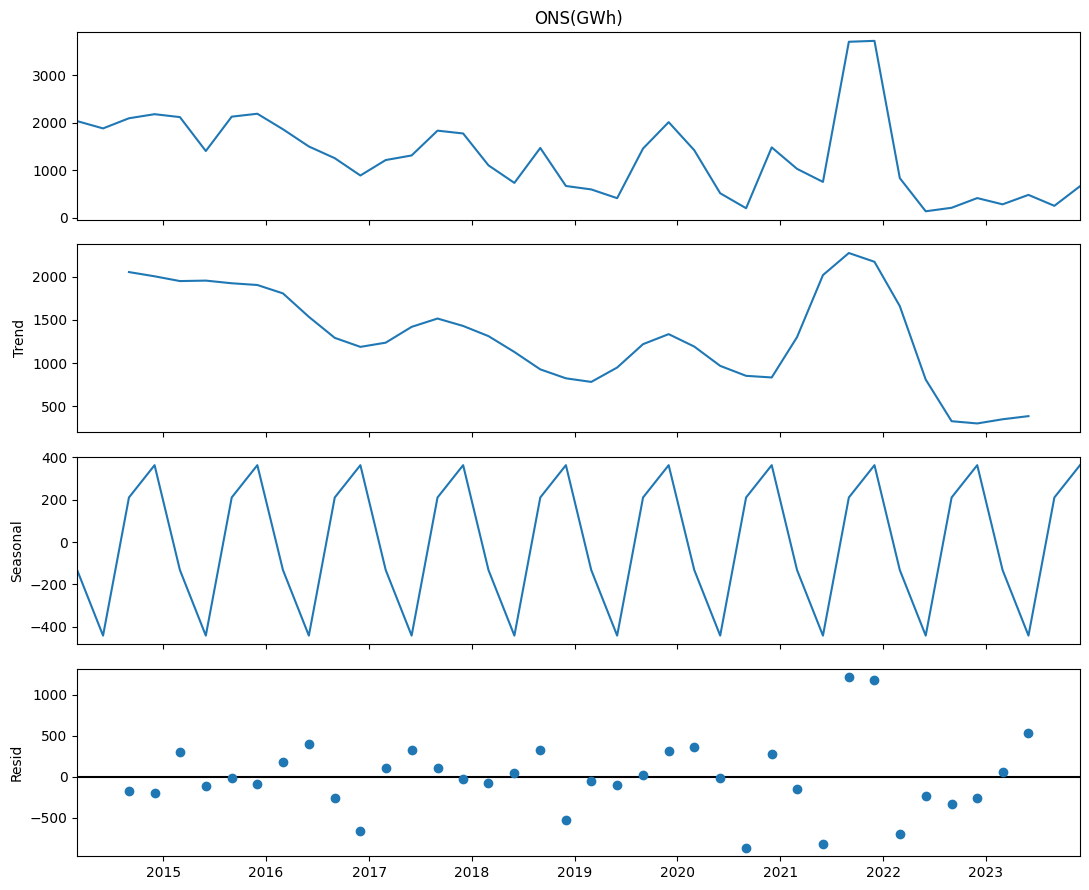

In [9]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 11, 9
df.index = pd.to_datetime(df.index, format='%m-%Y')
decomposition = sm.tsa.seasonal_decompose(df['ONS(GWh)'])

fig = decomposition.plot()
plt.show()

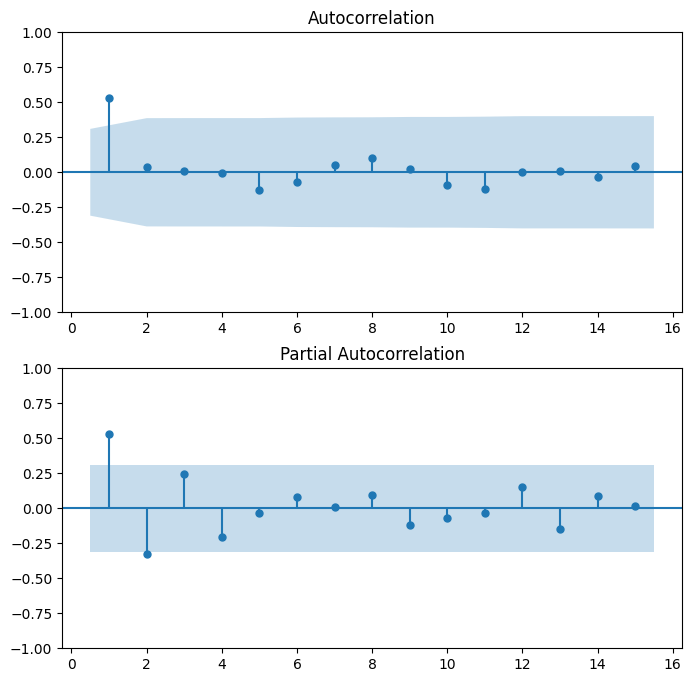

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))
# Make ACF plot
plot_acf(df['ONS(GWh)'], lags=15, zero=False, ax=ax1)
# Make PACF plot
plot_pacf(df['ONS(GWh)'], lags=15, zero=False, ax=ax2)
plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller
# Check for stationarity using the Augmented Dickey-Fuller (ADF) test
def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
        
# Perform the ADF test
print('Results of Augmented Dickey-Fuller Test:')
adf_test(df['ONS(GWh)'])

Results of Augmented Dickey-Fuller Test:
ADF Statistic: -2.827131400198927
p-value: 0.05450153290092911
Critical Values:
   1%: -3.626651907578875
   5%: -2.9459512825788754
   10%: -2.6116707716049383


#### 4.4.2.2 - Diff 1

In [21]:
df_dif1 = df.diff().dropna()

In [23]:
df_dif1.head()

,ONS(GWh)
date,
06-2014,-153.49
09-2014,213.55
12-2014,85.65
03-2015,-61.33
06-2015,-713.81


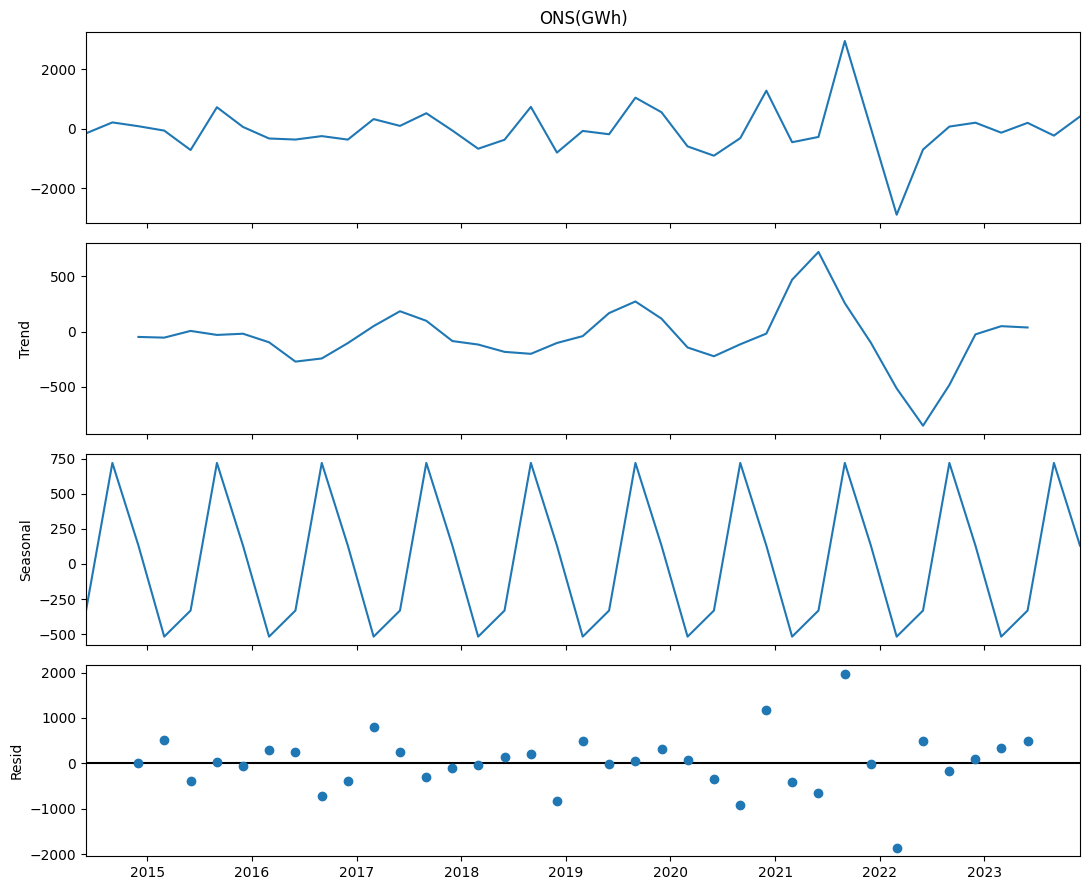

In [24]:
rcParams['figure.figsize'] = 11, 9
df_dif1.index = pd.to_datetime(df_dif1.index, format='%m-%Y')
decomposition = sm.tsa.seasonal_decompose(df_dif1['ONS(GWh)'])

fig = decomposition.plot()
plt.show()

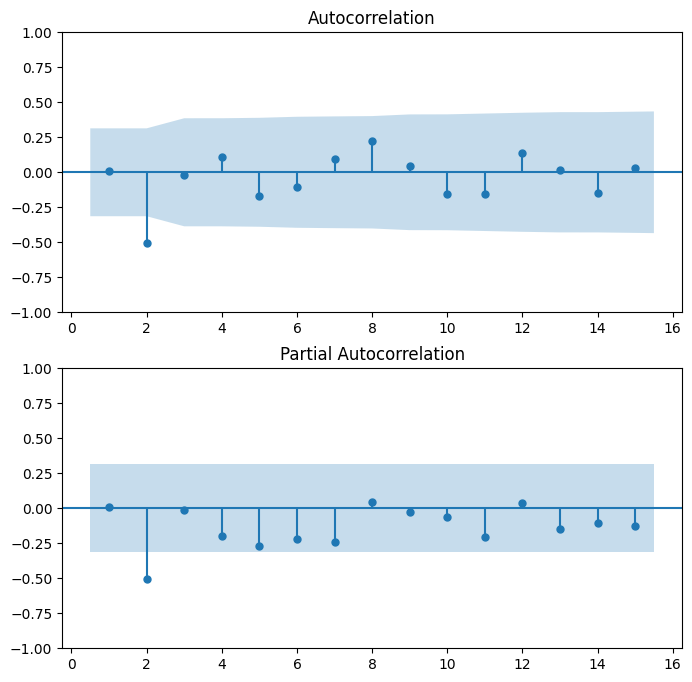

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))
# Make ACF plot
plot_acf(df_dif1['ONS(GWh)'], lags=15, zero=False, ax=ax1)
# Make PACF plot
plot_pacf(df_dif1['ONS(GWh)'], lags=15, zero=False, ax=ax2)
plt.show()

In [27]:
# Perform the ADF test
print('Results of Augmented Dickey-Fuller Test:')
adf_test(df_dif1['ONS(GWh)'])

Results of Augmented Dickey-Fuller Test:
ADF Statistic: -7.187221490540513
p-value: 2.5581665068478464e-10
Critical Values:
   1%: -3.6209175221605827
   5%: -2.9435394610388332
   10%: -2.6104002410518627


#### 4.4.2.3 - Diff 2

In [48]:
df_dif2 = df.diff(2).dropna()

In [49]:
df_dif2.head()

,ONS(GWh)
date,
09-2014,60.06
12-2014,299.20
03-2015,24.32
06-2015,-775.14
09-2015,9.56


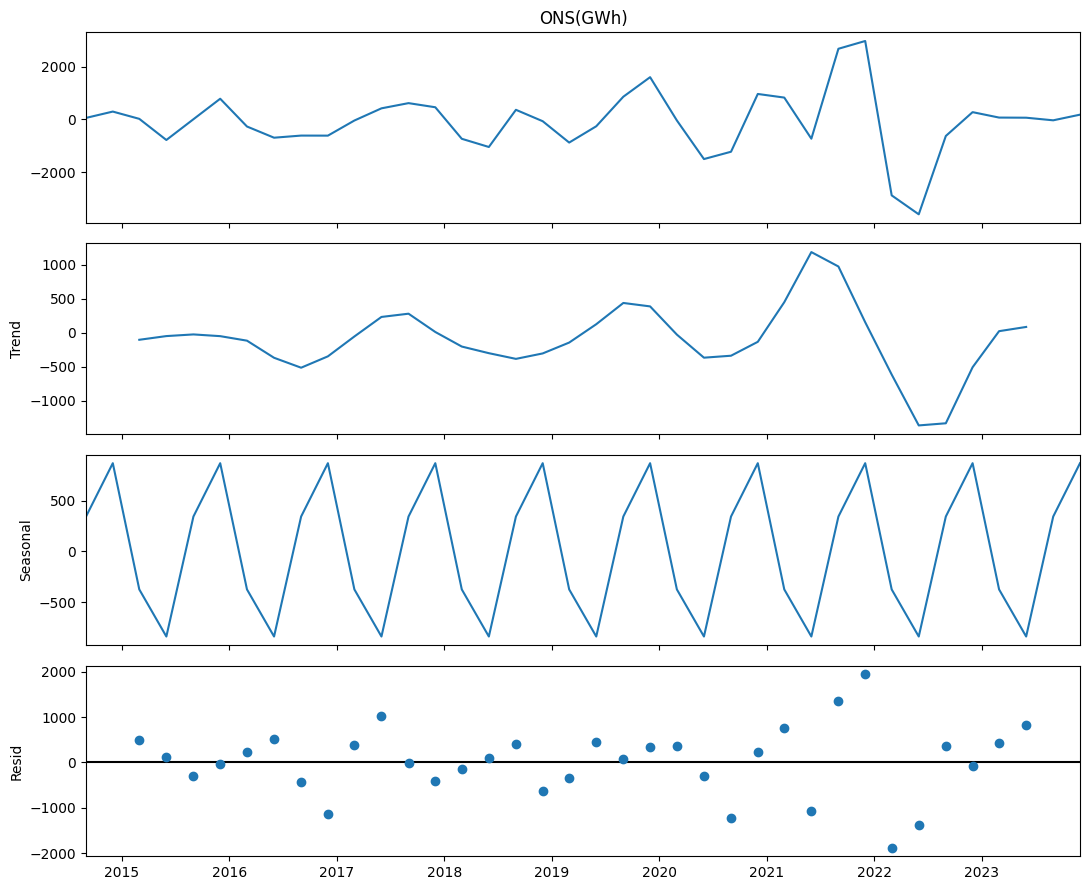

In [51]:
rcParams['figure.figsize'] = 11, 9
df_dif2.index = pd.to_datetime(df_dif2.index, format='%m-%Y')
decomposition = sm.tsa.seasonal_decompose(df_dif2['ONS(GWh)'])

fig = decomposition.plot()
plt.show()

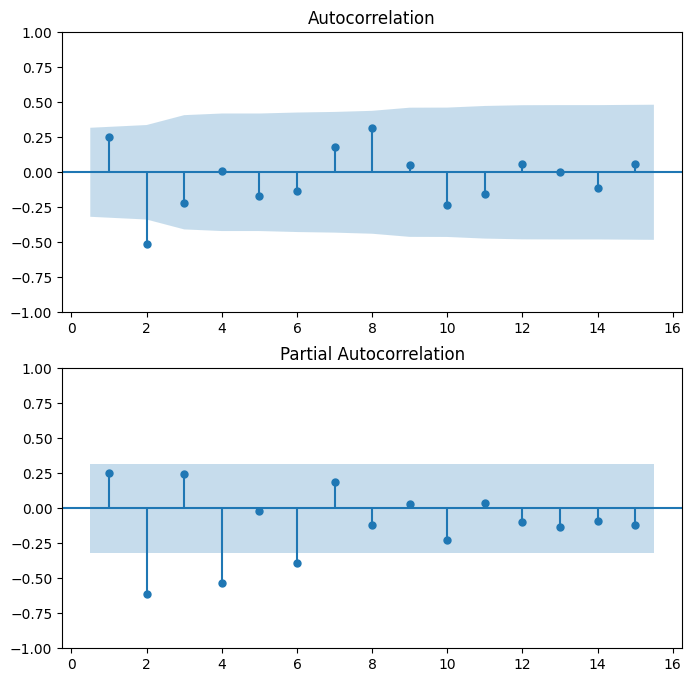

In [52]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))
# Make ACF plot
plot_acf(df_dif2['ONS(GWh)'], lags=15, zero=False, ax=ax1)
# Make PACF plot
plot_pacf(df_dif2['ONS(GWh)'], lags=15, zero=False, ax=ax2)
plt.show()

In [58]:
# Perform the ADF test
print('Results of Augmented Dickey-Fuller Test:')
adf_test(df_dif2['ONS(GWh)'])

Results of Augmented Dickey-Fuller Test:
ADF Statistic: -1.852840292357331
p-value: 0.3545610872214804
Critical Values:
   1%: -3.6889256286443146
   5%: -2.9719894897959187
   10%: -2.6252957653061224


#### 4.4.2.4 - ARIMA

In [66]:
# METRICS
def calc_smape(actual, forecast):
    return 1/len(actual) * np.sum(2 * np.abs(forecast-actual) / (np.abs(actual) + np.abs(forecast)))

def calc_mse(actual, forecast):
    squared_errors = (actual - forecast)**2
    mse = np.mean(squared_errors)
    return mse
    
def calc_mae(actual, forecast):
    absolute_errors = np.abs(actual - forecast)
    mae = np.mean(absolute_errors)
    return mae

In [60]:
import numpy as np
TEST_SIZE = 4
train, test = df.iloc[:-TEST_SIZE], df.iloc[-TEST_SIZE:]
x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], df.shape[0]))
train.shape, x_train.shape, test.shape, x_test.shape

((36, 1), (36,), (4, 1), (4,))

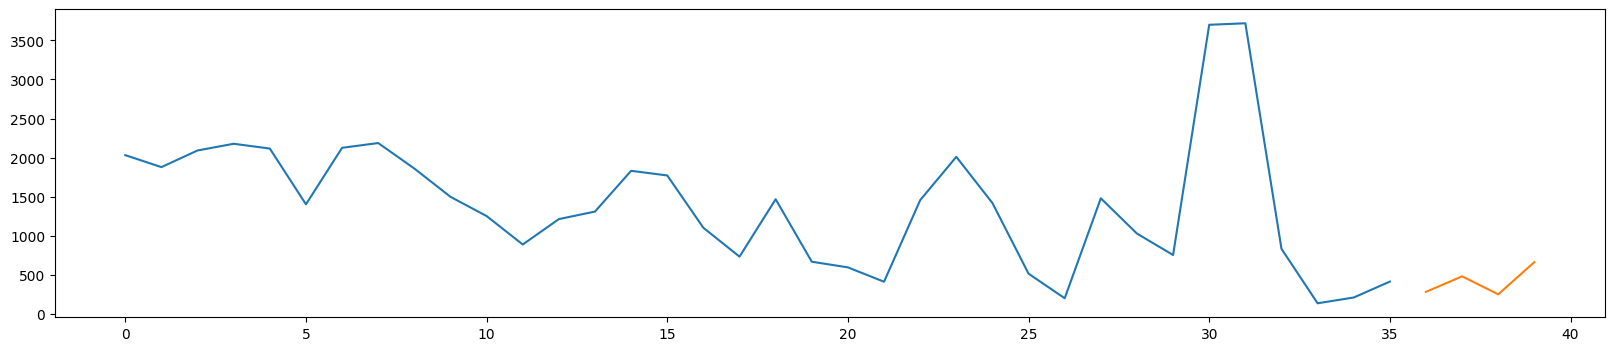

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(20, 4))
ax.plot(x_train, train)
ax.plot(x_test, test)

##### 4.4.2.4.1 - No dif, no seasonality.

In [62]:
import pmdarima as pm
# Use auto ARIMA to automatically select the best parameters
model = pm.auto_arima(df['ONS(GWh)'], start_p=0, start_q=0, max_p=4, max_q=4, information_criterion='aic', trace=True, error_action='ignore')

# Print the summary of the best model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=656.858, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=645.647, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=639.341, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=703.397, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=640.468, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=640.155, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=642.680, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=671.088, Time=0.03 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.288 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -316.670
Date:                Sun, 17 Mar 2024   AIC                            639.341
Time:                        12:46:39   BIC 

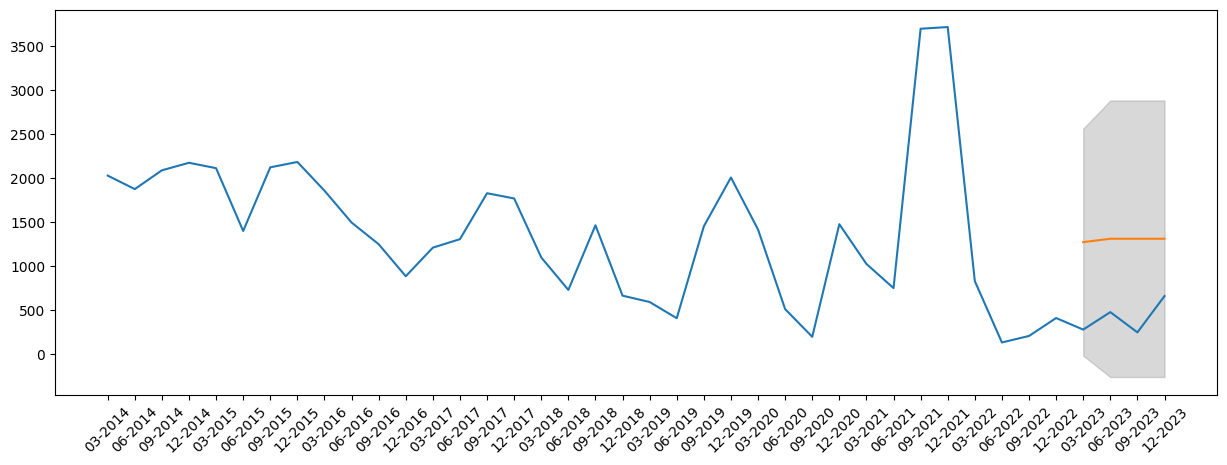

In [64]:
prediction, confint = model.predict(n_periods=TEST_SIZE, return_conf_int=True)
cf= pd.DataFrame(confint)
prediction_series = pd.Series(prediction.values,index=test.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(df)
ax.plot(prediction_series)
plt.xticks(rotation=45)
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.3)

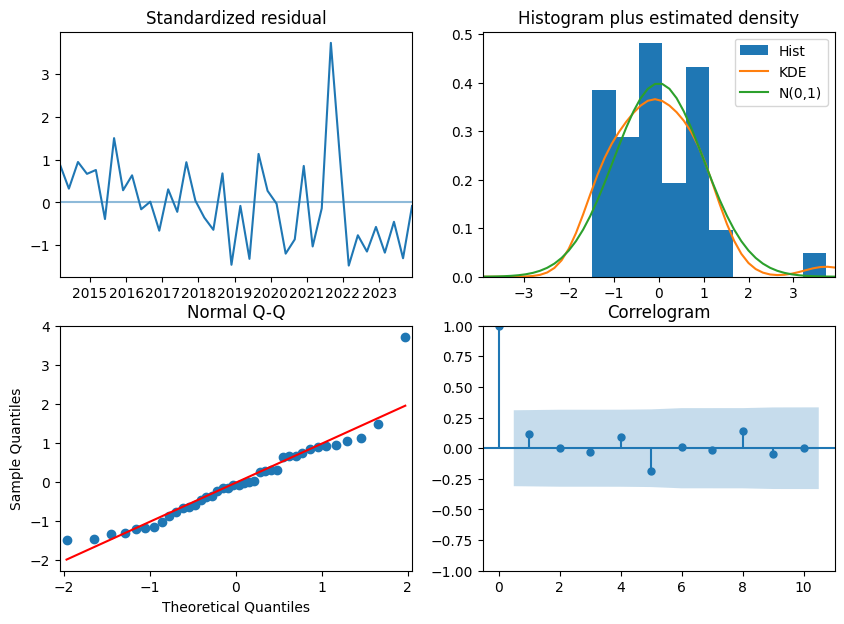

In [65]:
model.plot_diagnostics(figsize=(10,7))
plt.show()

In [71]:
smape=calc_smape(test['ONS(GWh)'],prediction.values)
mse=calc_mse(test['ONS(GWh)'],prediction.values)
mae=calc_mae(test['ONS(GWh)'],prediction.values)
print('SMAPE:'+ str(smape))
print('MSE:' + str(mse))
print('MAE:'+  str(mae))

SMAPE:1.0581365665437956
MSE:810244.6054679744
MAE:885.9663835197731


##### 4.4.2.4.2 - Dif = 1, seasonality = 4

In [72]:
# Use auto ARIMA to automatically select the best parameters
model = pm.auto_arima(df['ONS(GWh)'], seasonal=True, m=4, d=1, start_p=0, start_q=0, max_p=4, max_q=4, information_criterion='aic', trace=True, error_action='ignore')

# Print the summary of the best model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[4] intercept   : AIC=639.411, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=637.853, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=641.430, Time=0.02 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=641.365, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=635.924, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[4] intercept   : AIC=639.430, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[4] intercept   : AIC=639.542, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[4] intercept   : AIC=639.865, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=639.838, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=639.347, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[4]          
Total fit time: 0.461 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -3

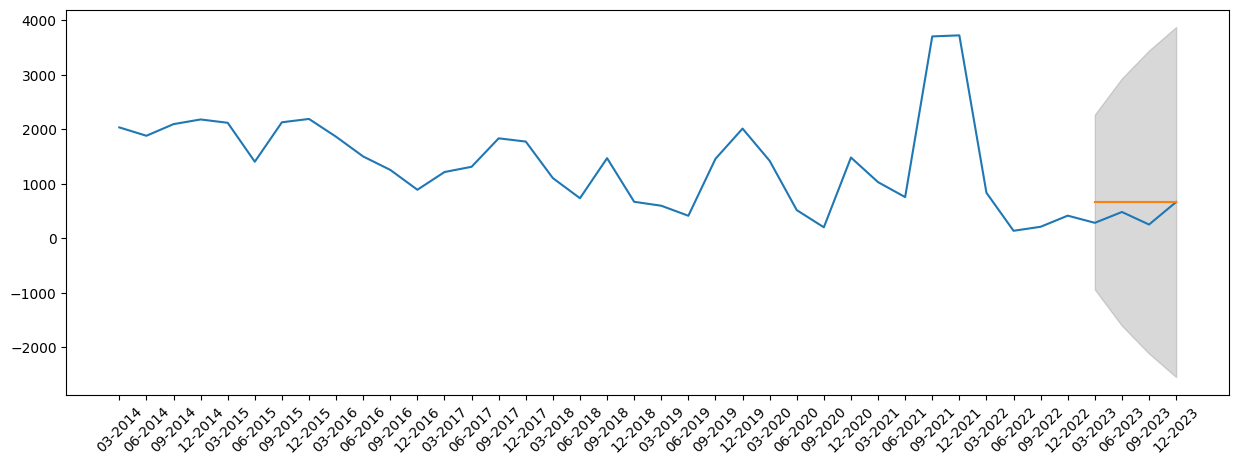

In [73]:
prediction, confint = model.predict(n_periods=TEST_SIZE, return_conf_int=True)
cf= pd.DataFrame(confint)
prediction_series = pd.Series(prediction.values,index=test.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(df)
ax.plot(prediction_series)
plt.xticks(rotation=45)
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.3)

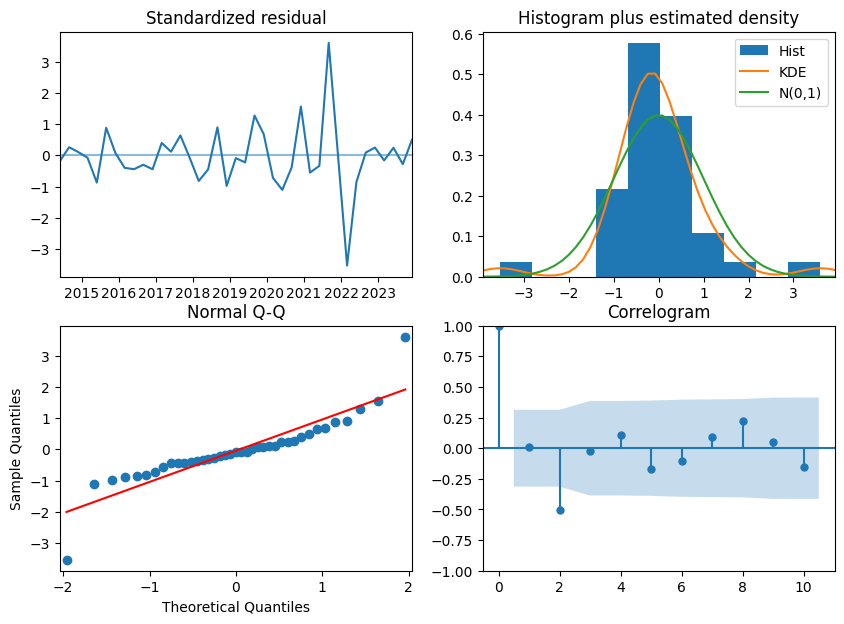

In [74]:
model.plot_diagnostics(figsize=(10,7))
plt.show()

In [75]:
smape=calc_smape(test['ONS(GWh)'],prediction.values)
mse=calc_mse(test['ONS(GWh)'],prediction.values)
mae=calc_mae(test['ONS(GWh)'],prediction.values)
print('SMAPE:'+ str(smape))
print('MSE:' + str(mse))
print('MAE:'+  str(mae))

SMAPE:0.5090607686371018
MSE:87216.49362499992
MAE:244.05749999999992


##### 4.4.2.4.3 - Dif = 1, seasonality period= 2

In [76]:
# Use auto ARIMA to automatically select the best parameters
model = pm.auto_arima(df['ONS(GWh)'], seasonal=True, m=2, d=1, start_p=0, start_q=0, max_p=4, max_q=4, information_criterion='aic', trace=True, error_action='ignore')

# Print the summary of the best model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[2]             : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,1,0)[2]             : AIC=645.942, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[2]             : AIC=625.364, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[2]             : AIC=inf, Time=0.05 sec
 ARIMA(1,1,0)(0,1,0)[2]             : AIC=647.953, Time=0.01 sec
 ARIMA(1,1,0)(2,1,0)[2]             : AIC=618.985, Time=0.07 sec
 ARIMA(1,1,0)(2,1,1)[2]             : AIC=607.768, Time=0.11 sec
 ARIMA(1,1,0)(1,1,1)[2]             : AIC=607.427, Time=0.09 sec
 ARIMA(1,1,0)(0,1,1)[2]             : AIC=inf, Time=0.05 sec
 ARIMA(1,1,0)(1,1,2)[2]             : AIC=605.420, Time=0.12 sec
 ARIMA(1,1,0)(0,1,2)[2]             : AIC=603.513, Time=0.09 sec
 ARIMA(0,1,0)(0,1,2)[2]             : AIC=601.546, Time=0.14 sec
 ARIMA(0,1,0)(0,1,1)[2]             : AIC=inf, Time=0.04 sec
 ARIMA(0,1,0)(1,1,2)[2]             : AIC=603.466, Time=0.08 sec
 ARIMA(0,1,1)(0,1,2)[2]             : AIC=603.510, Time=0.18 se

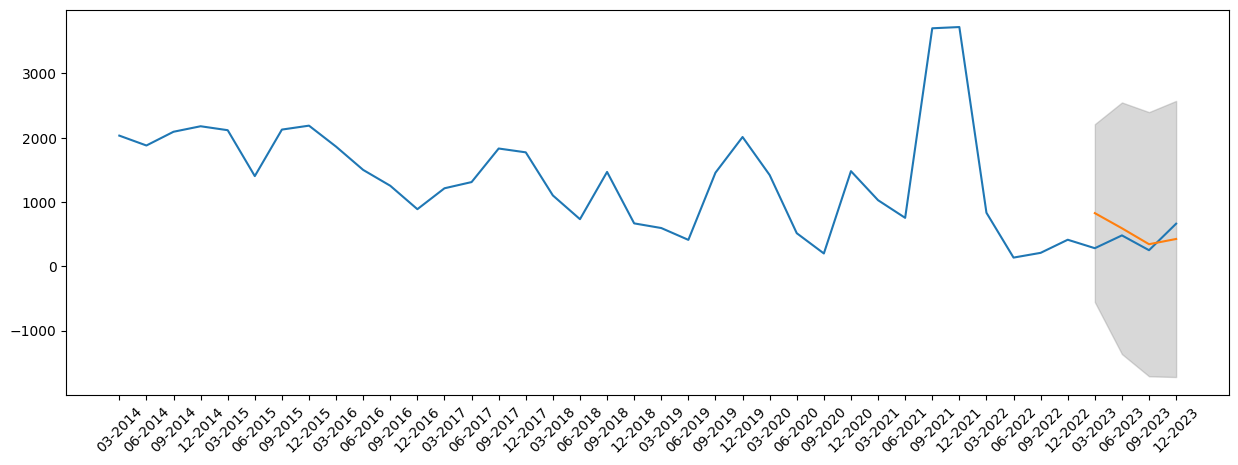

In [77]:
prediction, confint = model.predict(n_periods=TEST_SIZE, return_conf_int=True)
cf= pd.DataFrame(confint)
prediction_series = pd.Series(prediction.values,index=test.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(df)
ax.plot(prediction_series)
plt.xticks(rotation=45)
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.3)

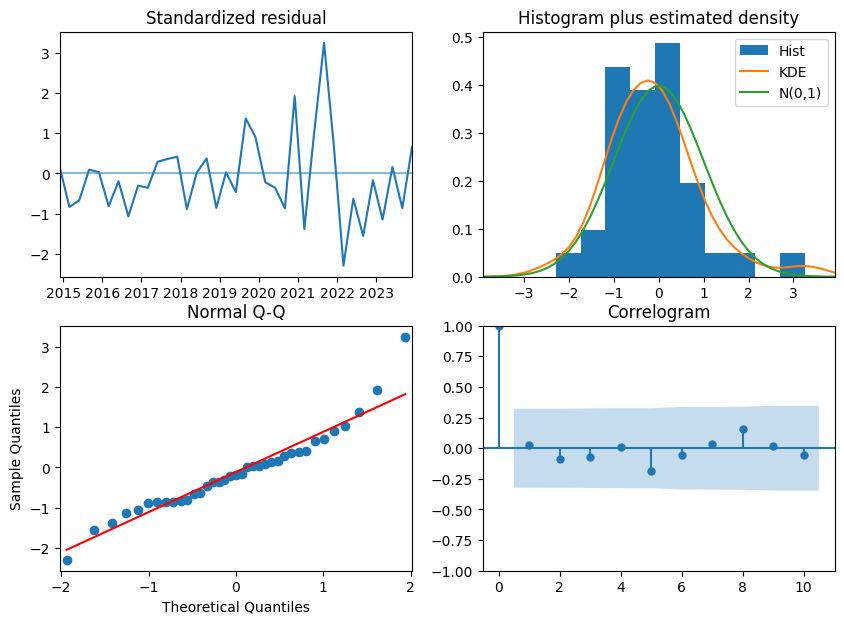

In [78]:
model.plot_diagnostics(figsize=(10,7))
plt.show()

In [79]:
smape=calc_smape(test['ONS(GWh)'],prediction.values)
mse=calc_mse(test['ONS(GWh)'],prediction.values)
mae=calc_mae(test['ONS(GWh)'],prediction.values)
print('SMAPE:'+ str(smape))
print('MSE:' + str(mse))
print('MAE:'+  str(mae))

SMAPE:0.4870880772567364
MSE:93742.51674417681
MAE:246.85607853631456


##### 4.4.2.4.4 - Dif = 2, seasonality = 4

In [80]:
# Use auto ARIMA to automatically select the best parameters
model = pm.auto_arima(df['ONS(GWh)'], seasonal=True, m=4, d=2, start_p=0, start_q=0, max_p=4, max_q=4, information_criterion='aic', trace=True, error_action='ignore')

# Print the summary of the best model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(1,0,1)[4]             : AIC=647.444, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[4]             : AIC=646.477, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[4]             : AIC=646.309, Time=0.02 sec
 ARIMA(0,2,1)(0,0,1)[4]             : AIC=inf, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[4]             : AIC=646.222, Time=0.01 sec
 ARIMA(1,2,0)(0,0,1)[4]             : AIC=646.632, Time=0.03 sec
 ARIMA(1,2,0)(1,0,1)[4]             : AIC=646.399, Time=0.09 sec
 ARIMA(2,2,0)(0,0,0)[4]             : AIC=632.081, Time=0.02 sec
 ARIMA(2,2,0)(1,0,0)[4]             : AIC=634.048, Time=0.03 sec
 ARIMA(2,2,0)(0,0,1)[4]             : AIC=634.060, Time=0.03 sec
 ARIMA(2,2,0)(1,0,1)[4]             : AIC=635.057, Time=0.14 sec
 ARIMA(3,2,0)(0,0,0)[4]             : AIC=631.624, Time=0.06 sec
 ARIMA(3,2,0)(1,0,0)[4]             : AIC=627.949, Time=0.12 sec
 ARIMA(3,2,0)(2,0,0)[4]             : AIC=627.962, Time=0.22 sec
 ARIMA(3,2,0)(1,0,1)[4]             : AIC=628.055, 

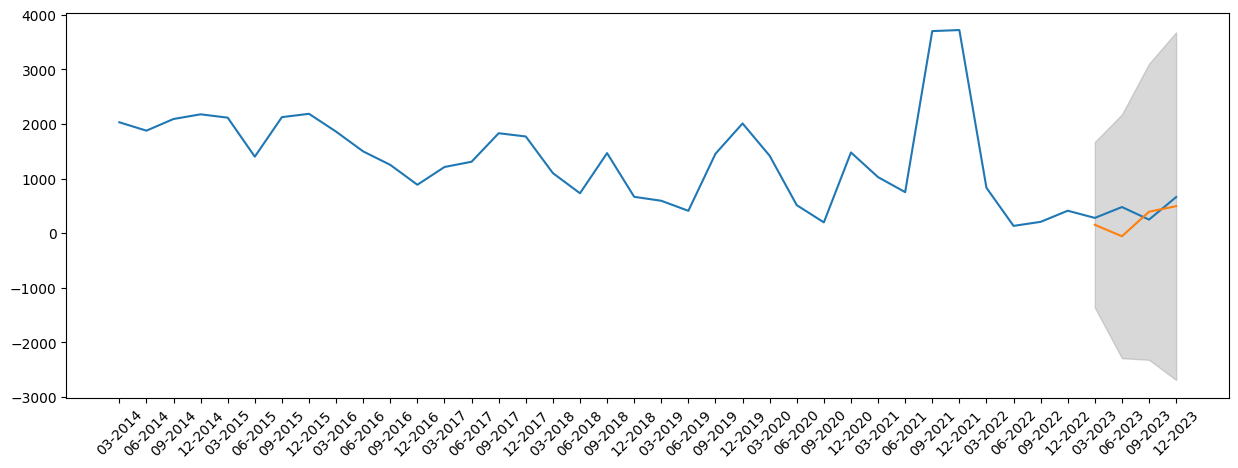

In [81]:
prediction, confint = model.predict(n_periods=TEST_SIZE, return_conf_int=True)
cf= pd.DataFrame(confint)
prediction_series = pd.Series(prediction.values,index=test.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(df)
ax.plot(prediction_series)
plt.xticks(rotation=45)
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.3)

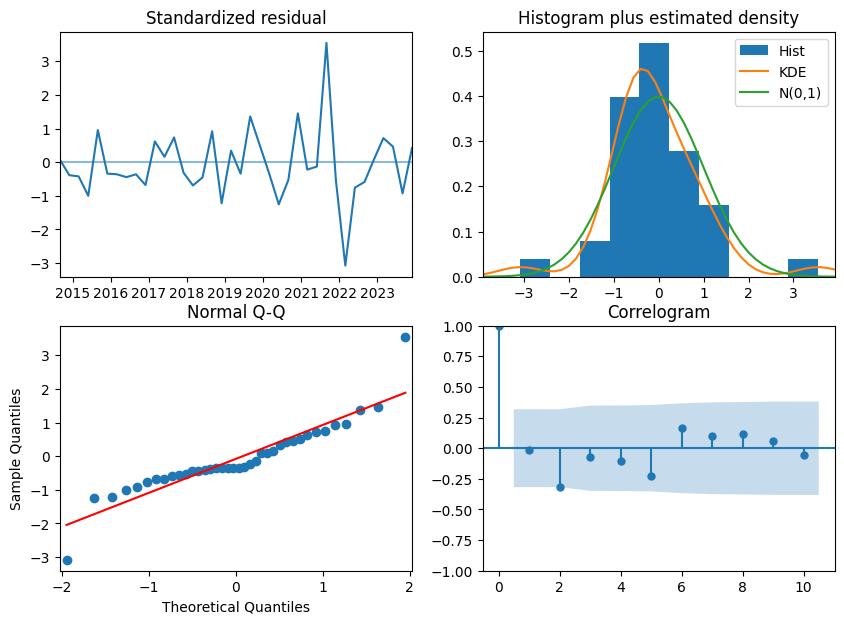

In [82]:
model.plot_diagnostics(figsize=(10,7))
plt.show()

In [83]:
smape=calc_smape(test['ONS(GWh)'],prediction.values)
mse=calc_mse(test['ONS(GWh)'],prediction.values)
mae=calc_mae(test['ONS(GWh)'],prediction.values)
print('SMAPE:'+ str(smape))
print('MSE:' + str(mse))
print('MAE:'+  str(mae))

SMAPE:0.8295232236741422
MSE:87595.54516083436
MAE:242.85853756872825


##### 4.4.2.4.5 - Dif = 2, seasonality = 2

In [84]:
# Use auto ARIMA to automatically select the best parameters
model = pm.auto_arima(df['ONS(GWh)'], seasonal=True, m=2, d=2, start_p=0, start_q=0, max_p=4, max_q=4, information_criterion='aic', trace=True, error_action='ignore')

# Print the summary of the best model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(1,1,1)[2]             : AIC=611.571, Time=0.16 sec
 ARIMA(0,2,0)(0,1,0)[2]             : AIC=654.109, Time=0.01 sec
 ARIMA(1,2,0)(1,1,0)[2]             : AIC=627.748, Time=0.05 sec
 ARIMA(0,2,1)(0,1,1)[2]             : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,1,1)[2]             : AIC=inf, Time=0.03 sec
 ARIMA(0,2,0)(1,1,0)[2]             : AIC=628.502, Time=0.02 sec
 ARIMA(0,2,0)(2,1,1)[2]             : AIC=611.774, Time=0.06 sec
 ARIMA(0,2,0)(1,1,2)[2]             : AIC=609.460, Time=0.14 sec
 ARIMA(0,2,0)(0,1,2)[2]             : AIC=607.654, Time=0.10 sec
 ARIMA(1,2,0)(0,1,2)[2]             : AIC=inf, Time=0.21 sec
 ARIMA(0,2,1)(0,1,2)[2]             : AIC=inf, Time=0.14 sec
 ARIMA(1,2,1)(0,1,2)[2]             : AIC=inf, Time=0.19 sec
 ARIMA(0,2,0)(0,1,2)[2] intercept   : AIC=609.622, Time=0.16 sec

Best model:  ARIMA(0,2,0)(0,1,2)[2]          
Total fit time: 1.376 seconds
                                       SARIMAX Results 

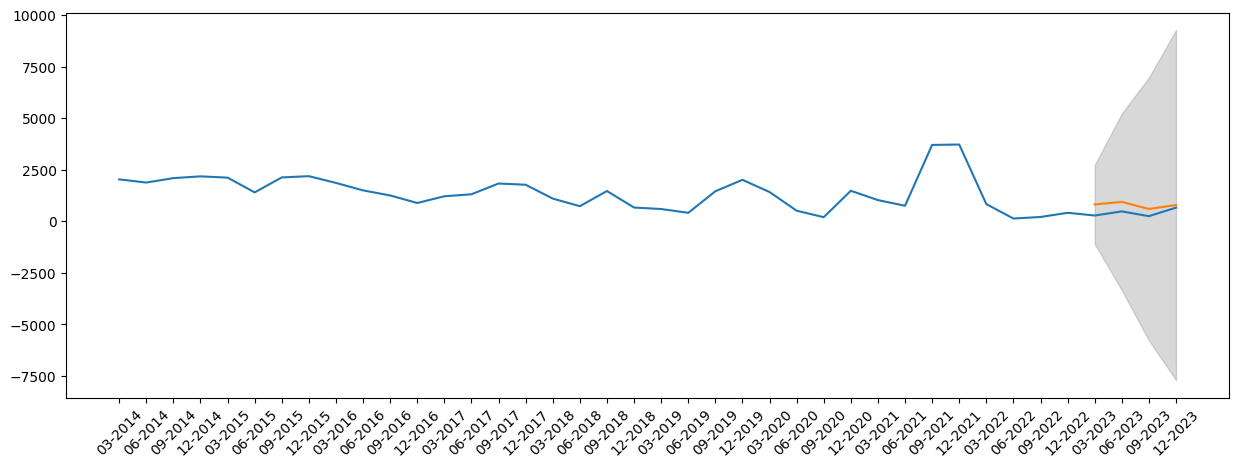

In [85]:
prediction, confint = model.predict(n_periods=TEST_SIZE, return_conf_int=True)
cf= pd.DataFrame(confint)
prediction_series = pd.Series(prediction.values,index=test.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(df)
ax.plot(prediction_series)
plt.xticks(rotation=45)
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.3)

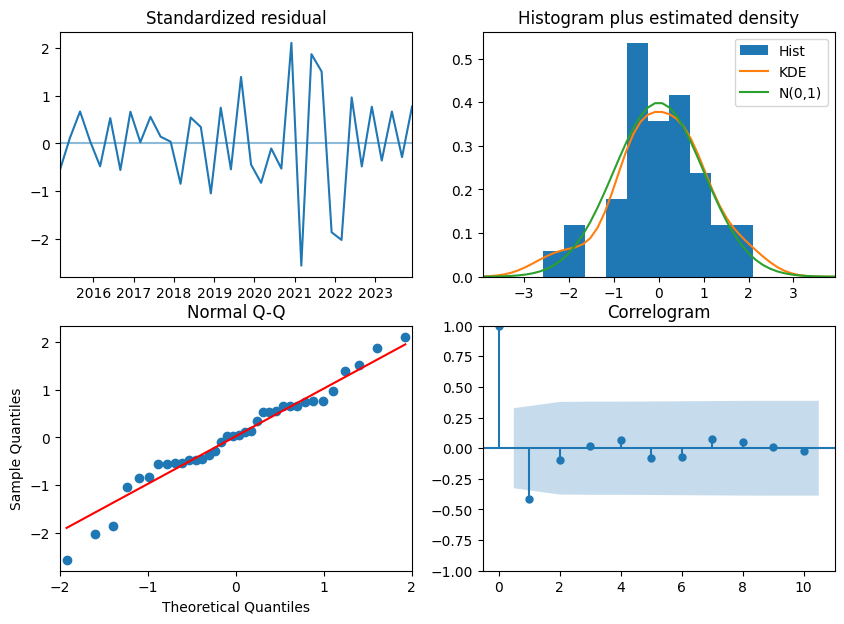

In [86]:
model.plot_diagnostics(figsize=(10,7))
plt.show()

In [87]:
smape=calc_smape(test['ONS(GWh)'],prediction.values)
mse=calc_mse(test['ONS(GWh)'],prediction.values)
mae=calc_mae(test['ONS(GWh)'],prediction.values)
print('SMAPE:'+ str(smape))
print('MSE:' + str(mse))
print('MAE:'+  str(mae))

SMAPE:0.6556496999310226
MSE:158941.35931608573
MAE:367.3736471986957
